# MLPayGrade: Machine Learning Track

## Goal

The goal of this project is to analyze and predict Machine Learning engineers' salaries using a comprehensive dataset from Kaggle.

## Key Features of the Dataset

The dataset contains 16,494 records with the following key fields:

-   `work_year`, `experience_level`, `employment_type`, `job_title`
-   `salary`, `salary_currency`, `salary_in_usd`
-   `employee_residence`, `remote_ratio`, `company_location`, `company_size`


The dataset can be found at: [Kaggle Machine Learning Engineer Salary in 2024](https://www.kaggle.com/datasets/chopper53/machine-learning-engineer-salary-in-2024/data)

---


# Week 1: Exploratory Data Analysis (EDA) – 07/13/2025

### Objectives

- Clean and explore the dataset
- Encode categorical variables and handle outliers
- Normalize salary values for improved model stability

### Key Questions

- Which roles or experience levels yield the highest average salary?
- Does remote work correlate with higher or lower salaries?
- Are there salary differences based on company size or location?
- How consistent are salaries across similar job titles?
---

In [28]:
import kagglehub
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Download dataser
path = kagglehub.dataset_download("chopper53/machine-learning-engineer-salary-in-2024")
print("Path to dataset files:", path)
salary_df = pd.read_csv("/Users/bonnieyuan/.cache/kagglehub/datasets/chopper53/machine-learning-engineer-salary-in-2024/versions/1/salaries.csv")
#salary_df.to_csv("/Users/bonnieyuan/Desktop/BIOSTATS/SDS-CP032-mlpaygrade/submissions/team-members/bonnie-yuan/salaries.csv", index=False)
salary_df.head()

Path to dataset files: /Users/bonnieyuan/.cache/kagglehub/datasets/chopper53/machine-learning-engineer-salary-in-2024/versions/1


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


## Univariate Analysis 
### Categorical Variables

Before addressing the key questions, we performed univariate analysis to explore the categorical variables, including `experience_level`, `employment_type`, `job_title`, `salary_currency`, `employee_residence`, `company_location`, and `company_size`.

**Key Findings:**

- There are no missing values in the dataset.
- The majority of job titles fall under the senior experience level (`SE`), followed by mid (`MI`), entry (`EN`), and executive (`EX`).
- More than 99% of `employment_type` is full-time. For future modeling, this variable may be excluded due to low variance.
- The top 10 job titles are: Data Engineer, Data Scientist, Data Analyst, Machine Learning Engineer, Research Scientist, Data Architect, Applied Scientist, Analytics Engineer, Research Engineer, and Data Science.
- The `job_title` column contains 155 unique categories. For modeling, consider reducing the number of categories or using target encoding.
- The majority of salaries are reported in USD. Since we have the `salary_in_usd` variable, we will use it as the target and may drop `salary_currency`.
- The distributions of `employee_residence` and `company_location` are similar. The top category is US, followed by GB, CA, ES, and DE. For future analysis, consider grouping into US vs. non-US.
- Most companies are medium-sized, followed by large and small companies.

In [30]:
salary_df.info() # No missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [31]:
salary_df.employment_type.value_counts()/16494

employment_type
FT    0.995150
PT    0.002304
CT    0.001698
FL    0.000849
Name: count, dtype: float64

In [32]:
salary_df.job_title.nunique()

155

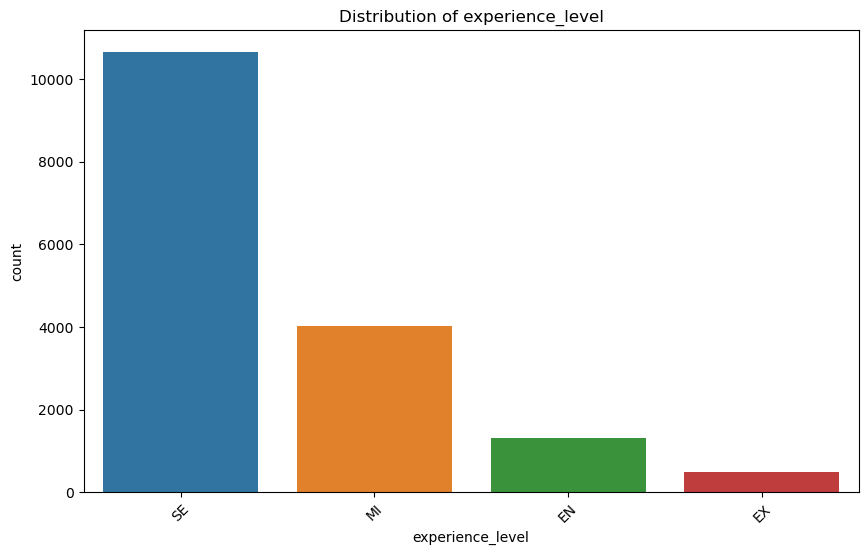

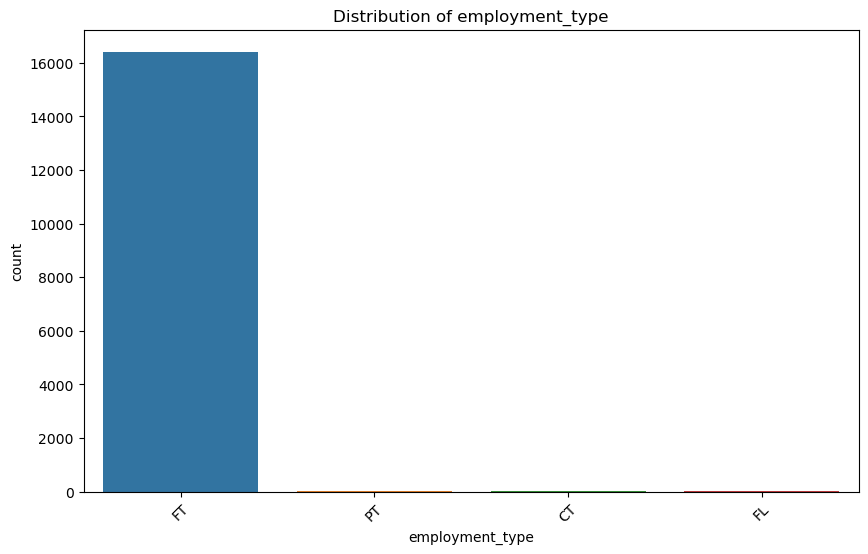

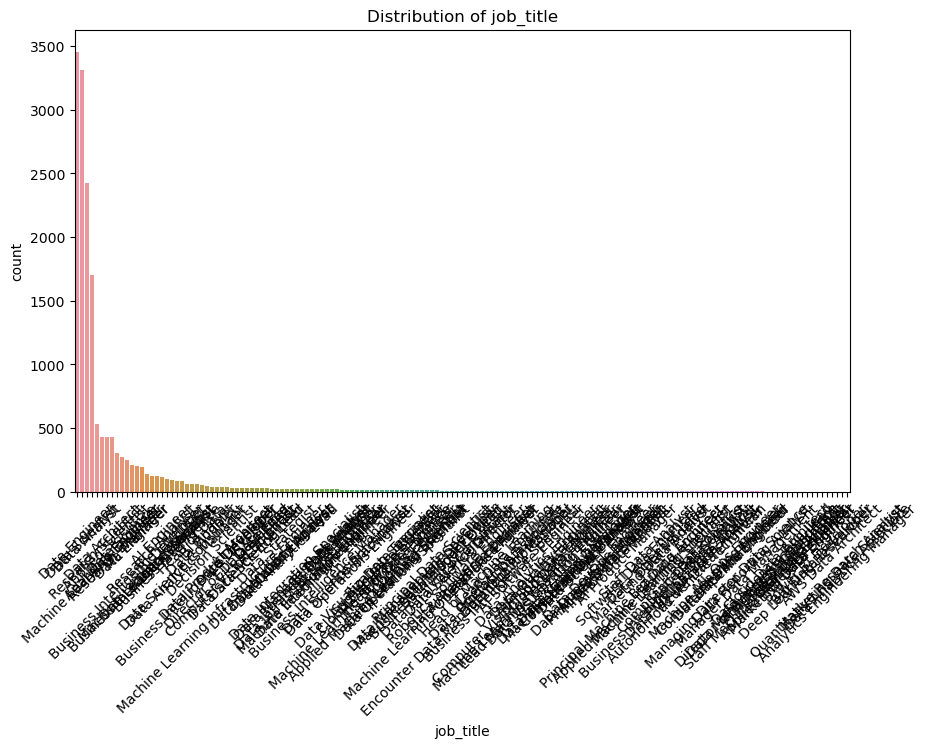

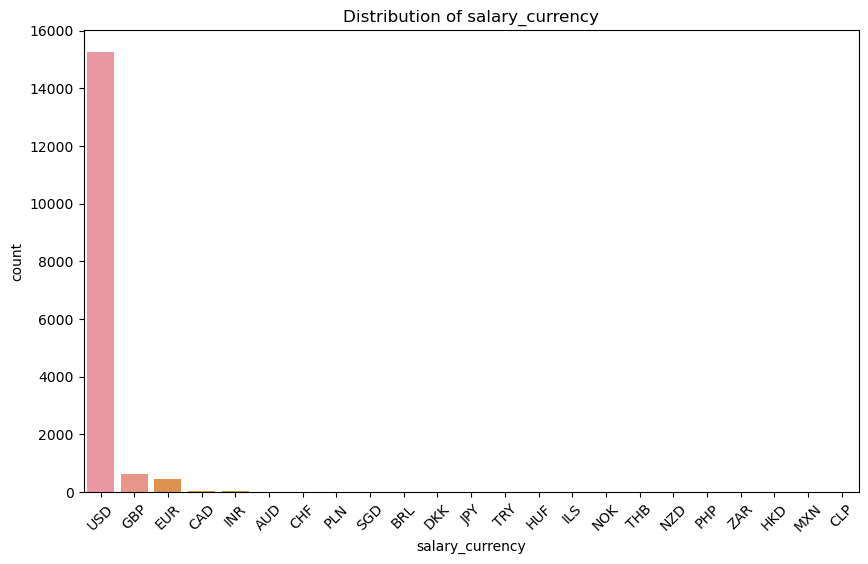

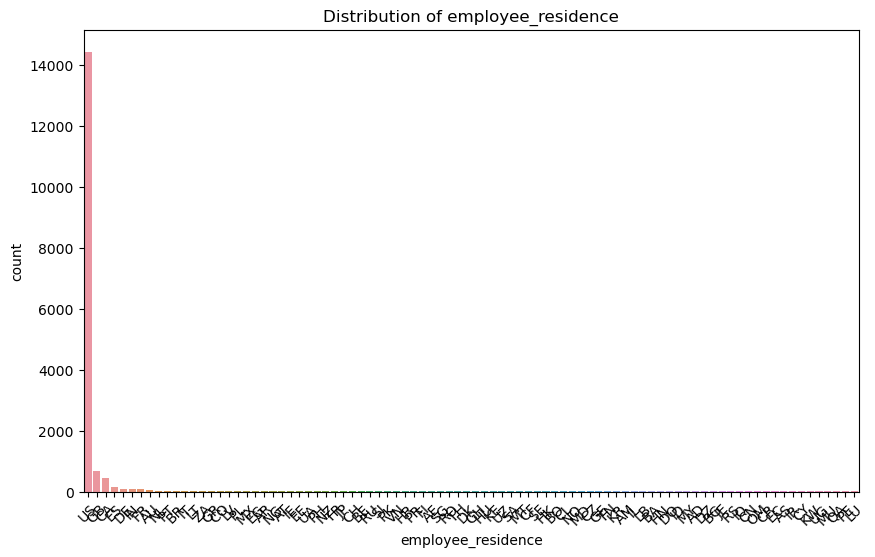

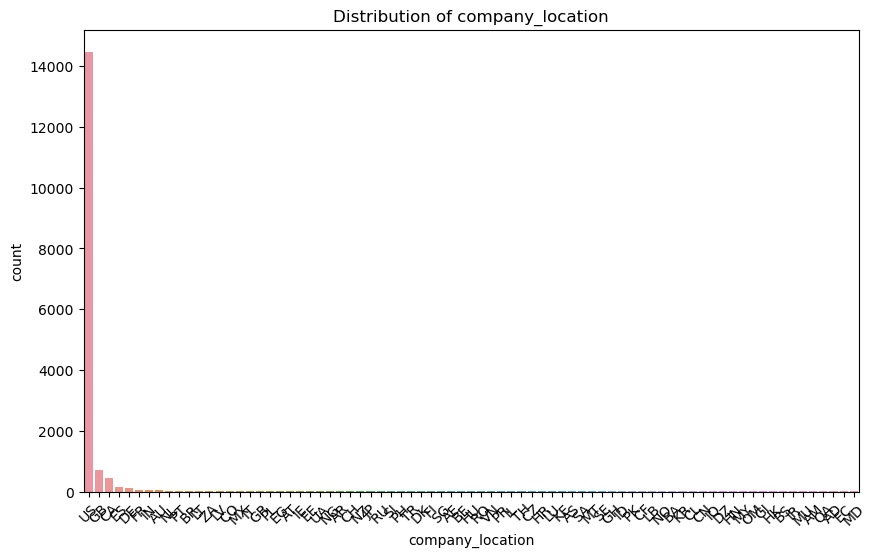

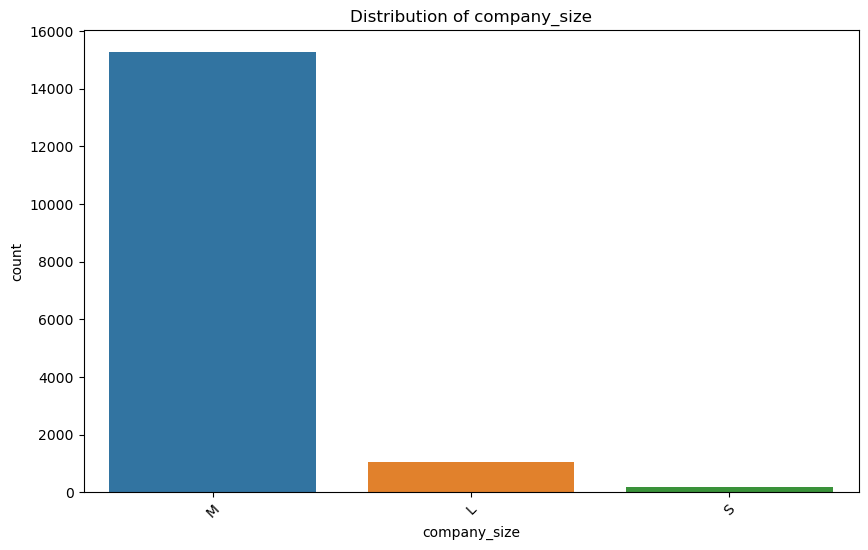

In [33]:
# Plot distributions for all categorical variables
categorical_columns = salary_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=salary_df, x=column, order=salary_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

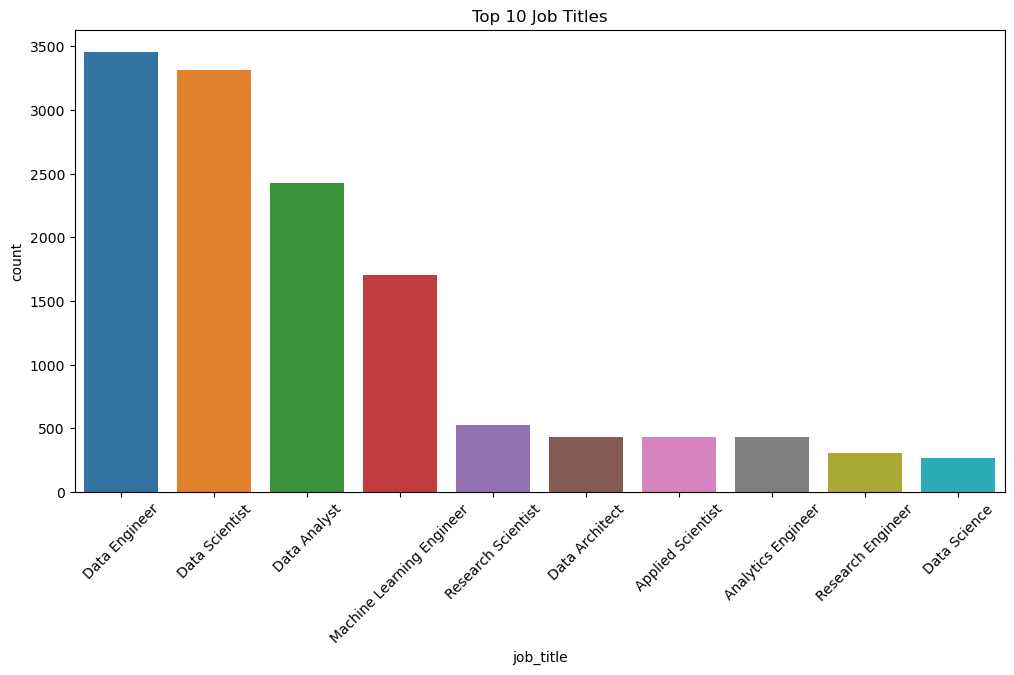

In [34]:
# plot top 10 job titles
top_job_titles = salary_df['job_title'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=salary_df[salary_df['job_title'].isin(top_job_titles)], x='job_title', order=top_job_titles)
plt.title('Top 10 Job Titles')
plt.xticks(rotation=45)
plt.show()  

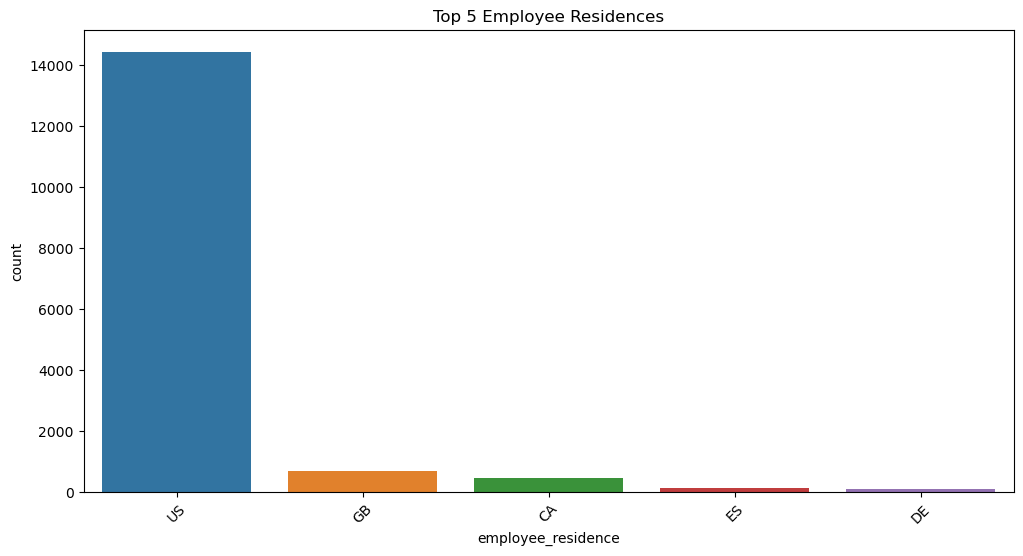

In [35]:
# plot top 5 employment residence
top_residences = salary_df['employee_residence'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.countplot(data=salary_df[salary_df['employee_residence'].isin(top_residences)], x='employee_residence', order=top_residences)
plt.title('Top 5 Employee Residences')
plt.xticks(rotation=45)
plt.show()  

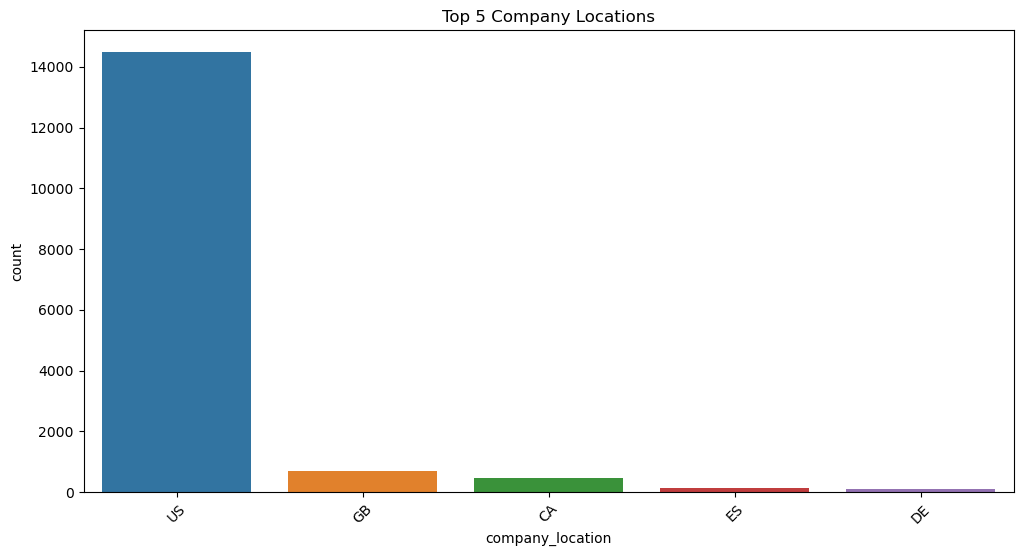

In [36]:
# plot top 5 company locations
top_locations = salary_df['company_location'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.countplot(data=salary_df[salary_df['company_location'].isin(top_locations)], x='company_location', order=top_locations)
plt.title('Top 5 Company Locations')
plt.xticks(rotation=45)
plt.show()  

In [37]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


### Continuous Variables
We then explore the distribution of continuous varibales including `work_year`, `salary`, `salary_in_usd` and `remote_ratio`

**Key Findings:**
-   The salary distribution is right-skewed, with a few high outliers. Log-transforming the salary helps normalize the distribution for modeling.
-   We decided to use Log-transformed `salary_in_usd` as target variable for future analysis.
-   Majoirity of job titles are in person roles (`remote ratio` = 0)


In [38]:
df_num = salary_df[['work_year','salary','salary_in_usd','remote_ratio']]
df_num.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16494.000000,1.649400e+04,16494.000000,16494.000000
mean,2023.224991,1.637878e+05,149713.575725,32.044986
std,0.713405,3.406017e+05,68516.136918,46.260201
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101517.500000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.873422e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


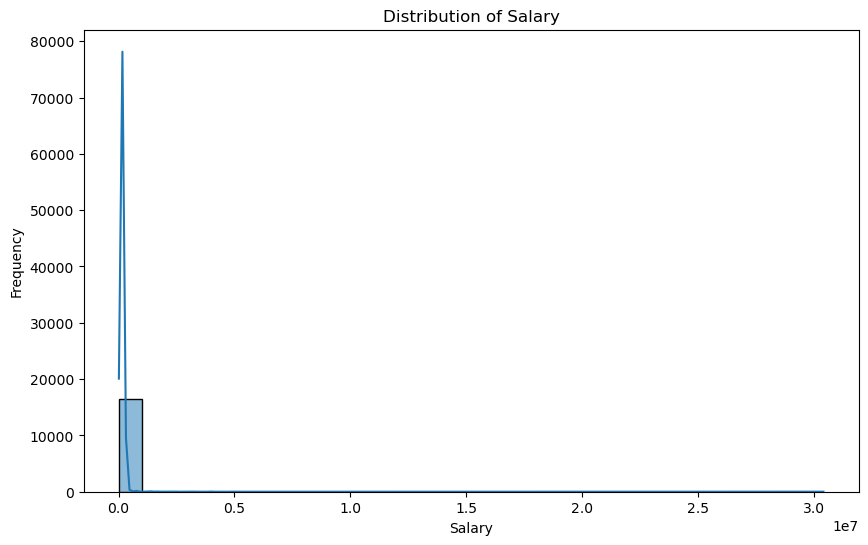

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


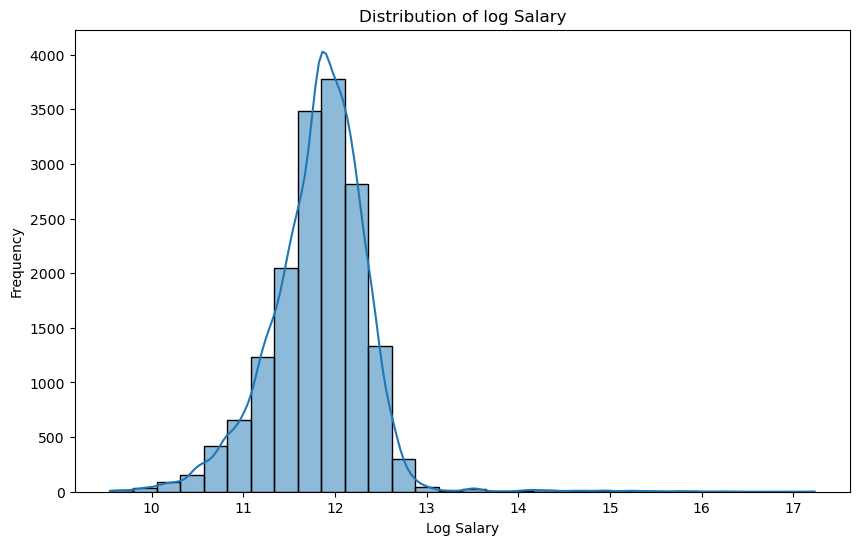

In [39]:
# plot histogram of salary and log salary
plt.figure(figsize=(10, 6))
sns.histplot(salary_df['salary'], bins=30, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(np.log(salary_df['salary']), bins=30, kde=True)
plt.title('Distribution of log Salary')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


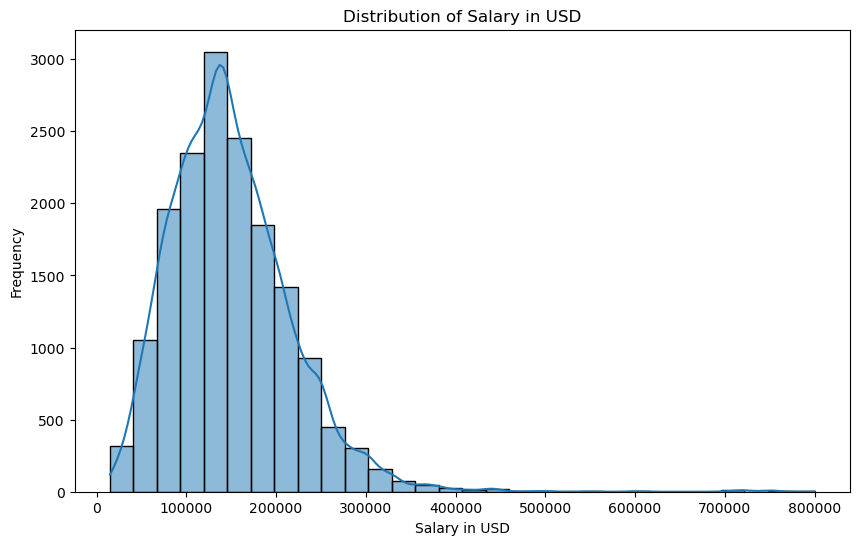

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


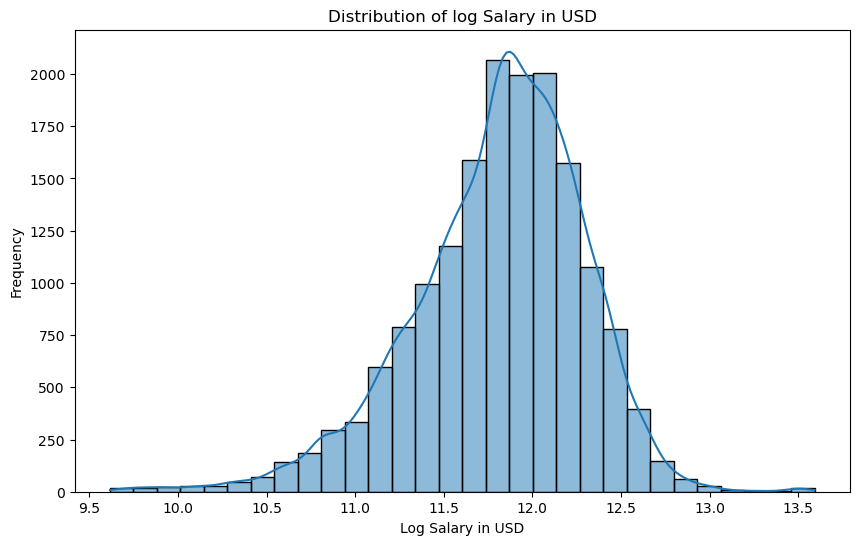

In [40]:
# plot histogram of salary and log salary
plt.figure(figsize=(10, 6))
sns.histplot(salary_df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(np.log(salary_df['salary_in_usd']), bins=30, kde=True)
plt.title('Distribution of log Salary in USD')
plt.xlabel('Log Salary in USD')
plt.ylabel('Frequency')
plt.show()

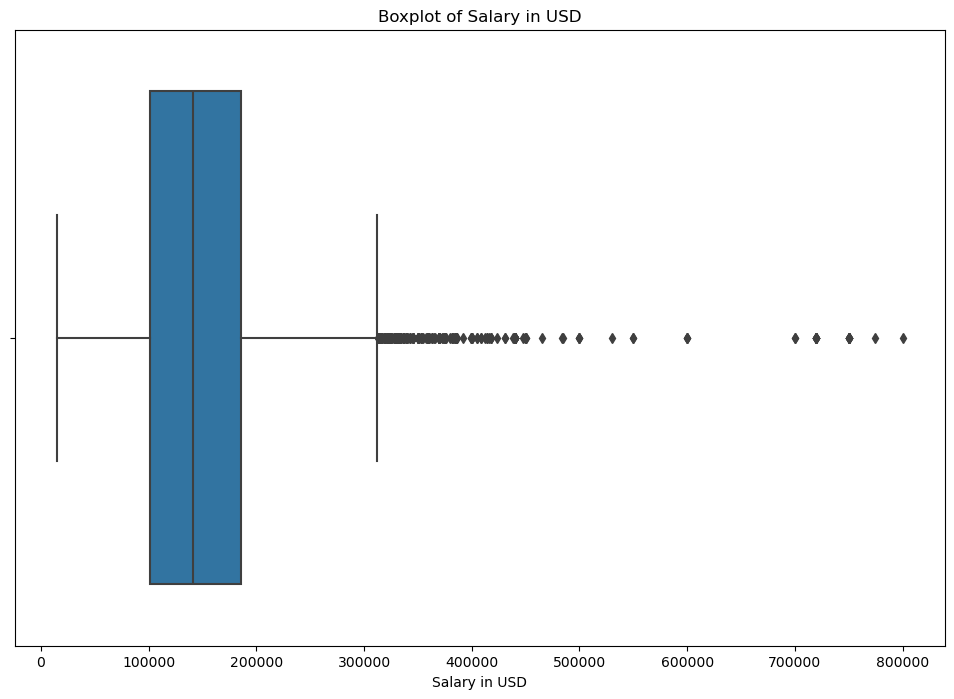

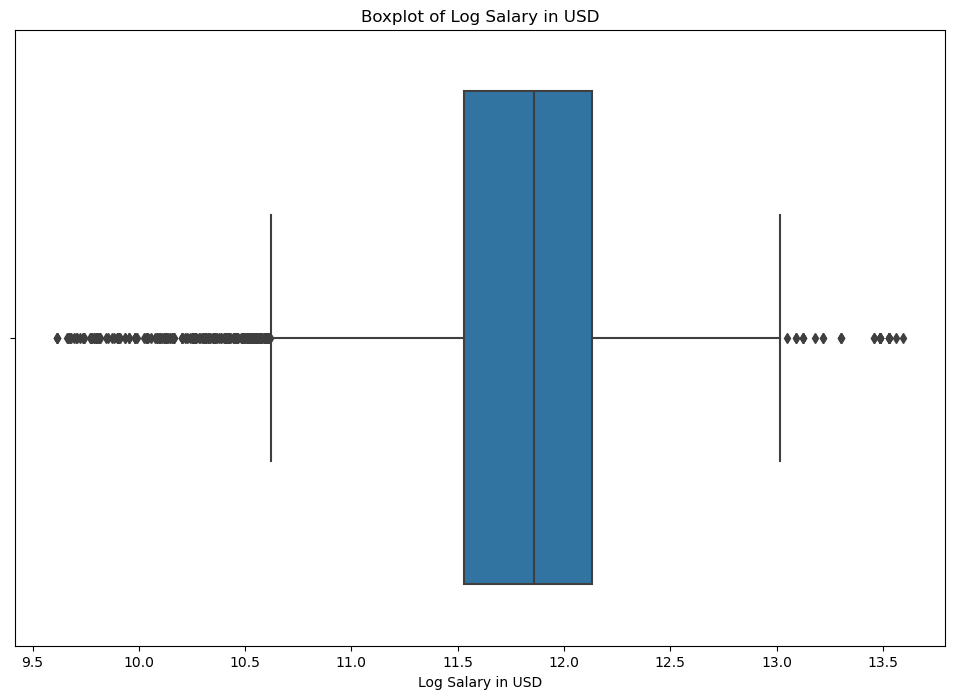

In [41]:
# plot boxplot of salary in usd
plt.figure(figsize=(12, 8))
sns.boxplot(data=salary_df, x='salary_in_usd')
plt.title('Boxplot of Salary in USD')
plt.xlabel('Salary in USD')
plt.show()  # right skewed distribution
# plot boxplot of log salary
plt.figure(figsize=(12, 8))
sns.boxplot(data=salary_df, x=np.log(salary_df['salary_in_usd']))
plt.title('Boxplot of Log Salary in USD')
plt.xlabel('Log Salary in USD')
plt.show()

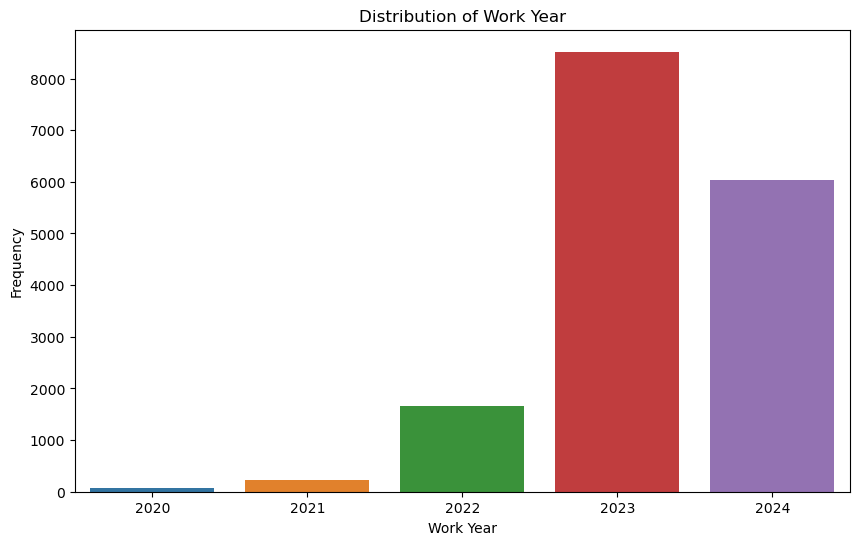

In [42]:
# plot bar plot of work year distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='work_year', data=salary_df)
plt.title('Distribution of Work Year')
plt.xlabel('Work Year')
plt.ylabel('Frequency')
plt.show()

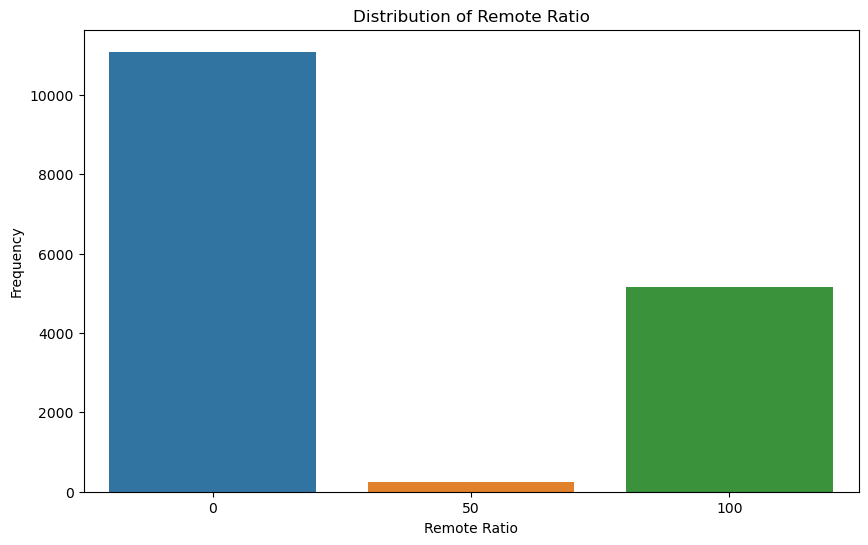

In [43]:
# plot barplot of remote ratio distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='remote_ratio', data=salary_df)
plt.title('Distribution of Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Frequency')
plt.show()

## Multivariate Analysis

**Key Findings**:
-   There is no strong correlation between log-salary in usd, work year, and remote type.

-   **Salary vs. Experience Level**:  Mean salary increases with experience level, as expected.

-   **Salary vs. Remote Ratio**: Either fully remote or fully in person have higher salary than hybrid

-   **Salary vs. Company Location**: US employees tend to have higher salaries than non-US employees

-   **Salary vs. Company Size**: M and L companies tend to pay higher salaries than S companies, but due the sample sizes among S and L, the difference is not quiet reliable

-   **Salary vs. Job title**: Data Scientist and Machine Learning Engineer have the highest salaries, while Data Analyst has the lowest salary among the top 10 job titles.

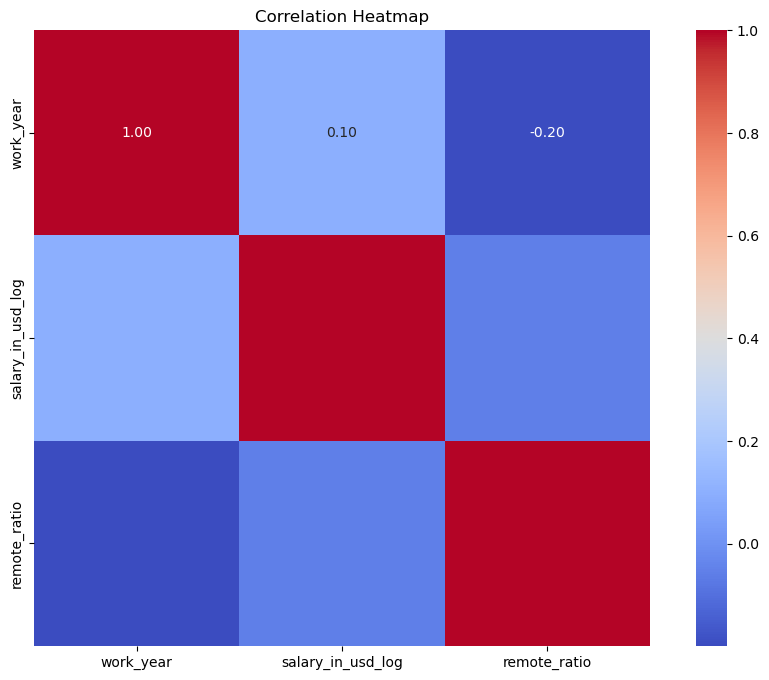

In [44]:
#log transformed slary in usd
salary_df['salary_in_usd_log'] = np.log(salary_df['salary_in_usd'])
# select continuous variables for correlation analysis
salary_df_cont = salary_df[['work_year', 'salary_in_usd_log', 'remote_ratio']].copy()
salary_df_cont
# correlation heatmap on continuous variables
plt.figure(figsize=(12, 8))
sns.heatmap(salary_df_cont.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show() # no strong correlations between continuous variables

In [45]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           16494 non-null  int64  
 1   experience_level    16494 non-null  object 
 2   employment_type     16494 non-null  object 
 3   job_title           16494 non-null  object 
 4   salary              16494 non-null  int64  
 5   salary_currency     16494 non-null  object 
 6   salary_in_usd       16494 non-null  int64  
 7   employee_residence  16494 non-null  object 
 8   remote_ratio        16494 non-null  int64  
 9   company_location    16494 non-null  object 
 10  company_size        16494 non-null  object 
 11  salary_in_usd_log   16494 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.5+ MB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


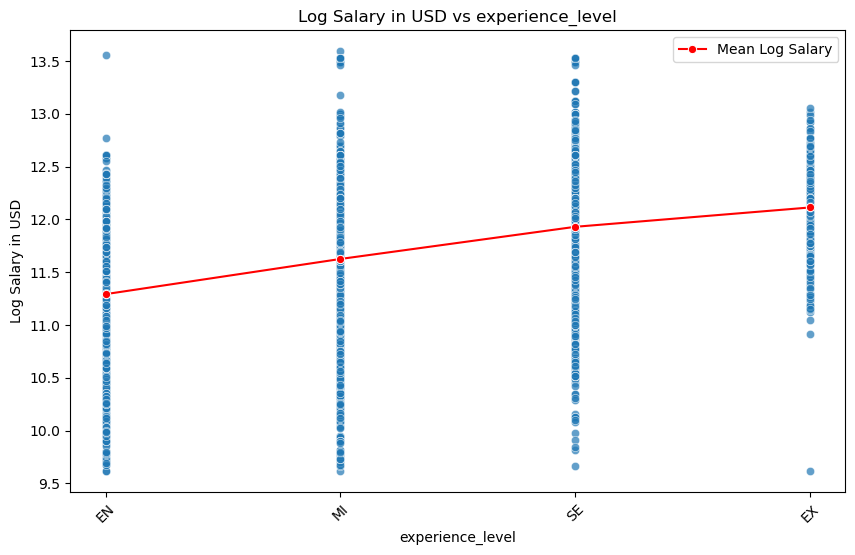

In [46]:
# plot experience level vs salary
# add mean of log salary among experience levels
mean_log_salary = salary_df.groupby('experience_level')['salary_in_usd_log'].mean().reset_index()
# change the experience level orders to be more intuitive
salary_df['experience_level'] = pd.Categorical(salary_df['experience_level'],
                                               categories=['EN', 'MI', 'SE', 'EX'],
                                               ordered=True)    

plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary_df, x='experience_level', y='salary_in_usd_log', alpha=0.7)
plt.title('Log Salary in USD vs experience_level')
plt.xlabel('experience_level')
plt.ylabel('Log Salary in USD')
# add mean of log salary for each experience level
sns.lineplot(data=mean_log_salary, x='experience_level', y='salary_in_usd_log', color='red', label='Mean Log Salary', marker='o')
plt.legend()
plt.xticks(rotation=45)
plt.show() # salary increases with experience level

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


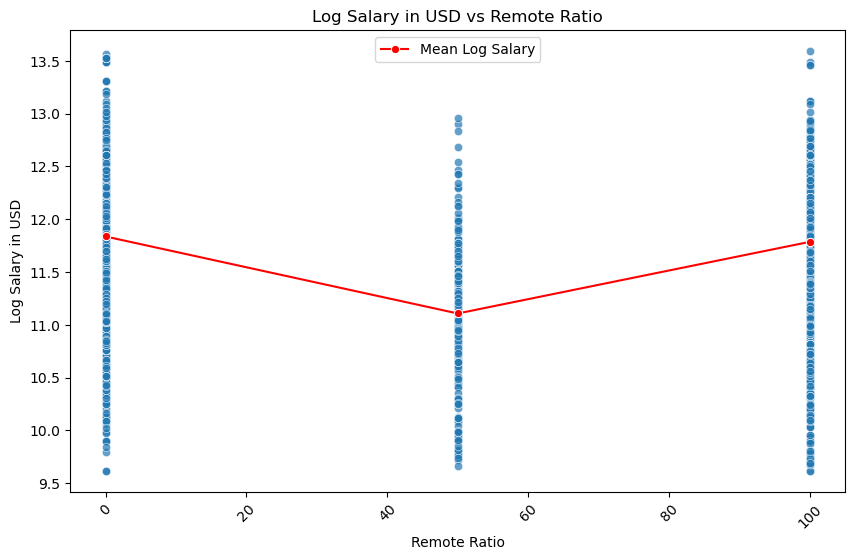

In [47]:
# plot remote ratio vs salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary_df, x='remote_ratio', y='salary_in_usd_log', alpha=0.7)
plt.title('Log Salary in USD vs Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Log Salary in USD')
# add mean of log salary for each remote ratio
mean_log_salary_remote = salary_df.groupby('remote_ratio')['salary_in_usd_log'].mean().reset_index()
sns.lineplot(data=mean_log_salary_remote, x='remote_ratio', y='salary_in_usd_log', color='red', label='Mean Log Salary', marker='o')
plt.legend()
plt.xticks(rotation=45)
plt.show() # fully remote jobs and fully in-person jobs have similar salaries, while hybrid jobs have lower salaries on average

/var/folders/rd/5sx7yv_12cgdj92sjt6ztrsc0000gn/T/ipykernel_73936/155350812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df_top_residences['employee_residence'] = pd.Categorical(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


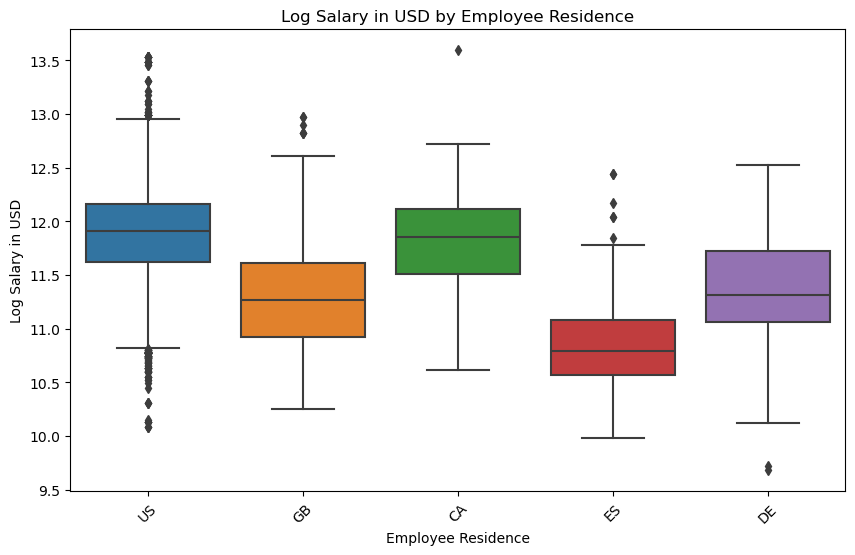

In [48]:
# plot employment localtion vs salar,only plot top 5 employee residences
top_residences = salary_df['employee_residence'].value_counts().nlargest(5).index
salary_df_top_residences = salary_df[salary_df['employee_residence'].isin(top_residences)]
salary_df_top_residences['employee_residence'] = pd.Categorical(
    salary_df_top_residences['employee_residence'],
    categories=top_residences,
    ordered=True
)
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df_top_residences, x='employee_residence', y='salary_in_usd_log')
plt.title('Log Salary in USD by Employee Residence')            
plt.xlabel('Employee Residence')
plt.ylabel('Log Salary in USD')
plt.xticks(rotation=45)
plt.show()  # US employees tend to have higher salaries than non-US employees, but there

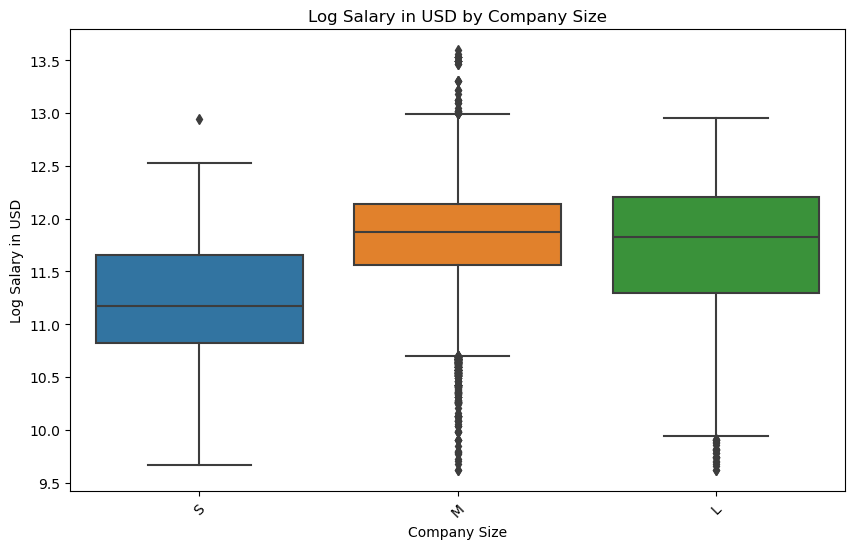

In [49]:
# plot Company Size vs Salary
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df, x='company_size', y='salary_in_usd_log')
plt.title('Log Salary in USD by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Log Salary in USD')
plt.xticks(rotation=45)
plt.show() 

/var/folders/rd/5sx7yv_12cgdj92sjt6ztrsc0000gn/T/ipykernel_73936/330696893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df_top_job_titles['job_title'] = pd.Categorical(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


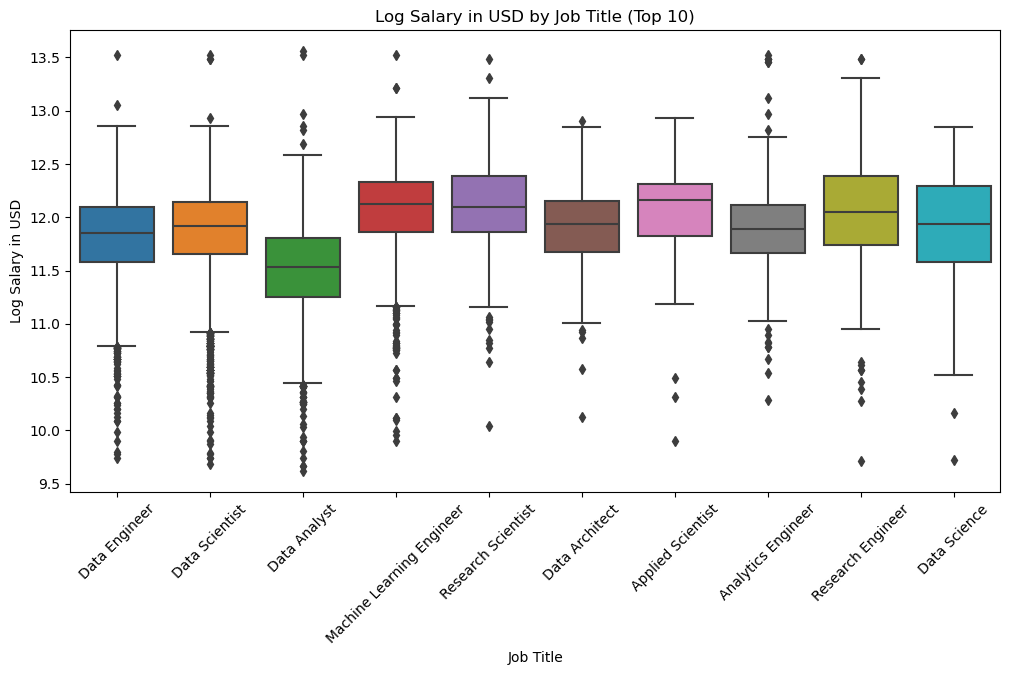

In [50]:
# plot Salary vs. Job title only the top 10 job titles
top_job_titles = salary_df['job_title'].value_counts().nlargest(10).index
salary_df_top_job_titles = salary_df[salary_df['job_title'].isin(top_job_titles)]
salary_df_top_job_titles['job_title'] = pd.Categorical(
    salary_df_top_job_titles['job_title'],
    categories=top_job_titles,
    ordered=True
) 
plt.figure(figsize=(12, 6))
sns.boxplot(data=salary_df_top_job_titles, x='job_title', y='salary_in_usd_log')
plt.title('Log Salary in USD by Job Title (Top 10)')
plt.xlabel('Job Title')
plt.ylabel('Log Salary in USD')
plt.xticks(rotation=45)
plt.show()  # Data Scientist and Machine Learning Engineer have the highest salaries, while Data Analyst
# has the lowest salary among the top 10 job titles.

# Week 2: Data Engineering and Pre-processing

This week, we focused on transforming and enriching the dataset to prepare it for modeling. The main steps included:

- **Normalized** `salary_usd` using a log transformation to improve model performance and address skewness.
- removed `salary_currency` and `salary` variables
- **Encoded categorical variables** using label encoding and one-hot encoding as appropriate.
- **Updated** `company_location` and `employee_residence` to binary categories: US and Non-US.
- **Extracted** job role type from `job_title` for more granular analysis. (Note: In the modeling step, we plan to conduct sensitivity analysis between using the reduced category option and target encoding for this variable.)
-   Split train test set


In [51]:
# update company location to US and non-US
salary_df['company_loc'] = salary_df['company_location'].apply(lambda x: 'US' if x == 'US' else 'Non-US')  
# employee location to US and non-US
salary_df['employee_loc'] = salary_df['employee_residence'].apply(lambda x: 'US' if x == 'US' else 'Non-US') 

In [52]:
# separete job titles into two varables, function, and level
job_titles = salary_df['job_title'].unique()
def get_role_type(title):
    title = title.lower()
    if any(x in title for x in ['scientist', 'research', 'modeler', 'decision']):
        return 'Modeling/Research'
    elif any(x in title for x in ['engineer', 'developer', 'architect', 'devops']):
        return 'Engineering/Infrastructure'
    elif any(x in title for x in ['analyst', 'analytics', 'bi ', 'insight']):
        return 'Analytics/Insight'
    elif any(x in title for x in ['manager', 'lead', 'head', 'director', 'strategist', 'owner']):
        return 'Leadership/Strategy'
    elif any(x in title for x in ['ops', 'operations']):
        return 'Operations/MLOps'
    elif any(x in title for x in ['specialist', 'consultant', 'practitioner']):
        return 'Specialist/Support'
    else:
        return 'Other'

# Function to classify job_level
def get_job_level(title):
    title = title.lower()
    if any(x in title for x in ['intern', 'associate']):
        return 'Entry'
    elif any(x in title for x in ['staff', 'senior']):
        return 'Senior'
    elif any(x in title for x in ['lead', 'principal']):
        return 'Senior/Lead'
    elif any(x in title for x in ['manager', 'director', 'head', 'chief']):
        return 'Executive'
    elif any(x in title for x in ['analyst', 'engineer', 'scientist', 'developer']):
        return 'Mid'
    else:
        return 'Other'

# Apply both
salary_df['role_type'] = salary_df['job_title'].apply(get_role_type)


In [53]:
salary_df['role_type'].value_counts()

role_type
Engineering/Infrastructure    7218
Modeling/Research             5055
Analytics/Insight             2935
Leadership/Strategy            631
Other                          394
Specialist/Support             243
Operations/MLOps                18
Name: count, dtype: int64

In [54]:
salary_df.drop(columns=['salary','salary_in_usd','employee_residence','company_location','salary_currency','job_title'], inplace=True)  # drop job title column

In [55]:
salary_df.info() # No missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   work_year          16494 non-null  int64   
 1   experience_level   16494 non-null  category
 2   employment_type    16494 non-null  object  
 3   remote_ratio       16494 non-null  int64   
 4   company_size       16494 non-null  object  
 5   salary_in_usd_log  16494 non-null  float64 
 6   company_loc        16494 non-null  object  
 7   employee_loc       16494 non-null  object  
 8   role_type          16494 non-null  object  
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 1.0+ MB


In [56]:
# encode categorical variables
salary_df_encoded = pd.get_dummies(
    salary_df,
    columns=['experience_level', 'employment_type', 'company_size', 'role_type', 'company_loc', 'employee_loc'],
    drop_first=True
).astype(int)  # This converts all columns to 0/1 integers

salary_df_encoded.head()

,work_year,remote_ratio,salary_in_usd_log,experience_level_MI,experience_level_SE,experience_level_EX,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,role_type_Engineering/Infrastructure,role_type_Leadership/Strategy,role_type_Modeling/Research,role_type_Operations/MLOps,role_type_Other,role_type_Specialist/Support,company_loc_US,employee_loc_US
0,2024,0,11,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,2024,0,11,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,2024,0,11,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3,2024,0,11,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
4,2024,0,12,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1


In [57]:
# train-test split
from sklearn.model_selection import train_test_split
X = salary_df_encoded.drop(columns=['salary_in_usd_log'])
y = salary_df_encoded['salary_in_usd_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
